## In this notebook
- Implement ADI
- Implement RK
    - Regular RK
    - Gower's algorithm


In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Randomized Kaczmarz

In [91]:
def randomized_kaczmarz(A,b, seed=None):
    """
    Solves using randomized kaczmarz.
    Randomly selects a row per iteration to update x with
    
    INPUT: matrix A mxn, vector b mx1 
    OUTPUT: vector x nx1 that solves Ax = b
    """
    m,n = A.shape
    x0 = np.ones(n)
    sols = [x0] # list of x_0 ... x_n
    errors = []
    if seed != None:
        np.random.seed(seed)

    while(True):
        i = np.random.randint(m)
#         print(i)
        xprev = sols[-1]
        num = A[i,:].dot( xprev) - b[i]
        den = A[i,:].dot( A[i,:])
        x = xprev - (num / den) * A[i]
#         print(np.linalg.norm(A.dot(x) - b))
        err = np.linalg.norm(A.dot(x) - b)
        errors.append(err)
                             
        sols.append(x)
        
        if (err < 1e-5):
            break
        xprev = x
    return sols,errors# print(x.shape)\


In [92]:
np.random.seed(1)
A = np.random.rand(3,5)
np.random.seed(1)
b = np.random.rand(3)
sols,errs = randomized_kaczmarz(A,b,0)
x= sols[-1]

# print(A.dot(x))
# print(b)
print(errs[-1])

9.053571414931998e-06


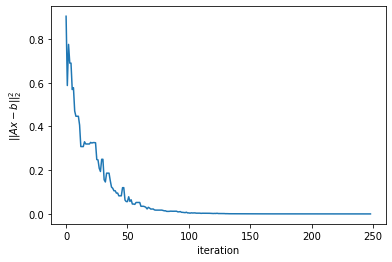

In [93]:
plt.plot(errs)
plt.xlabel("iteration")
plt.ylabel("$||Ax-b||^2_2$")
plt.show()

## ADI implementation


In [137]:
def linsolve(A,B):
    """
    Helper function that stacks together multiple Ax=b solvers
    INPUT: A,B
    OUTPUT: X mxn matrix such that AX = B
    """
    sol = []
    a,b = A.shape
    c,d = B.shape 
    assert (a == c)
    
    for col in B.T:        
        x,errs = randomized_kaczmarz(A,col) 
        sol.append(x[-1])
    return (np.stack(sol,axis = -1))
    

In [138]:
np.random.seed(3)
A = np.random.rand(3,3)
B = np.random.rand(3,6)
X = linsolve(A,B)
print(A.dot(X) - B)

[[ 8.25153252e-06  8.31895897e-06  8.47939126e-06  8.93620083e-06
   6.59671498e-06  9.63295829e-06]
 [-3.33066907e-16  1.56125113e-16  0.00000000e+00 -6.66133815e-16
   7.77156117e-16 -3.88578059e-16]
 [-3.89923529e-06 -5.31502913e-06 -4.94022451e-06 -3.06531515e-06
  -7.37735933e-06 -1.99604698e-06]]


In [23]:
def adi(A,B,F,N,p,q):
    m,_ = A.shape
    n,_ = B.shape
    # print(x.shape)\

print("hi")
    sols = []
    Xprev = np.zeros((m,n))
    
    for i in range(N):
        Ahalf = (A - p[i] * np.eye(m,m))
        Bhalf = Xprev * (B - q[i] * np.eye(n,n)) + F

        Xhalf = linsolve(Ahalf,Bhalf)   
        
        Asolve = (B - q[i] * np.eye(n,n))
        Bsolve = (A - q[i] * np.eye(m,m)) * Xhalf - F
        
        X = (linsolve(Asolve.T, Bsolve.T)).T
        sols.append(X)
        Xprev = X 
    return sols

In [24]:

N = 10
p = np.zeros(N)
q = np.zeros(N)

# p = p + 0.01
# q = q + 0.01
# A = np.eye(4, 4)
# B = np.eye(4,4) * 2.32
# F = np.eye(4,4) * 1.39

A = np.random.rand(4,4)
B = np.random.rand(4,4)
F = np.eye(4,4)


sols = adi(A,B,F,N,p,q)
# print(sols)
X = sols[-1]
print (A * X + X * B )


[[0.15896316 0.28269837 0.79935692 0.55471656]
 [0.84871275 0.32770642 0.48851027 0.00228307]
 [0.45285109 0.67060522 0.75513694 0.14489096]
 [0.51370512 0.65356804 0.22941171 0.74546055]]
[1. 0. 0. 0.]
[0. 0. 0. 0.]
[[0.15896316 0.28269837 0.79935692 0.55471656]
 [0.84871275 0.32770642 0.48851027 0.00228307]
 [0.45285109 0.67060522 0.75513694 0.14489096]
 [0.51370512 0.65356804 0.22941171 0.74546055]]
[0. 1. 0. 0.]
[0. 0. 0. 0.]
[[0.15896316 0.28269837 0.79935692 0.55471656]
 [0.84871275 0.32770642 0.48851027 0.00228307]
 [0.45285109 0.67060522 0.75513694 0.14489096]
 [0.51370512 0.65356804 0.22941171 0.74546055]]
[0. 0. 1. 0.]
[0. 0. 0. 0.]
[[0.15896316 0.28269837 0.79935692 0.55471656]
 [0.84871275 0.32770642 0.48851027 0.00228307]
 [0.45285109 0.67060522 0.75513694 0.14489096]
 [0.51370512 0.65356804 0.22941171 0.74546055]]
[0. 0. 0. 1.]
[0. 0. 0. 0.]


ValueError: operands could not be broadcast together with shapes (4,4) (16,) 

In [37]:
def random_vector_sketch(A,b):
    sols = [0]
    m,n = A.shape
    s = np.random.rand(m) * 0.001
    Binv = np.eye(n)
    
    for i in range(10):
        xprev = sols[-1]
        num = np.dot(s, (A * xprev - b))
        den = np.dot(s,A) * Binv * A.T * s
        
        x = xprev - num / den * Binv * A.T * s
        
        sols.append(x)
        xprev = x
    
    return sols
    

In [ ]:
A = np.eye(4) 
b = np.array([3,3,3,3])

# print(A)
# print(b)
# print (np.linalg.solve(A,b))

print(random_vector_sketch(A,b))